## Praktische Sterrenkunde - Observation Assignment 2: The Sun

**Year**: 2023-24 <br>
**Lecturer**: Ana Monreal Ibero <br>
**Author**: Olivier Burggraaff

## Introduction

In this assignment, we analyse the data taken in recent weeks with the heliostat and spectrograph in the Old Observatory. For this we use a Jupyter notebook.

Jupyter is an implementation of Python, where you can place text and code in one document. In this way, you can easily organise your analysis and results. Python code is split in Jupyter into so-called *cells*. Each cell contains its own piece of code, which can be run on its own. For example, you can use one cell to read your data, and another one to create a plot. If you want to create a new plot, you only run that cell - you don't have to run everything again, as is the case with a normal Pythonscript. The cells can communicate with each other, so you can use the results of cell 1 in cell 2.

To edit a cell, all you have to do is click on it. To run the code, you can press the run button at the top of the window (one triangle pointing to the right) or press ctrl+enter.

Figures and print statements appear under the cell in which they are made.

There are also so-called *markdown* cells, in which you can put text. The formatting for this is very simple: headings with \# characters, slanted text between \* characters (e.g. \*slanted\* becomes *slanted*), thick text between double \*\* (e.g. \*\*bold\*\* becomes **bold**). You can even write pieces of $\LaTeX$. Markdown cells can be edited by *double* clicking on them. Markdown cells are run in the same way as Python cells. Try it with this text, for example!

Finally, you can add cells to the *Insert* tab or with the + button on the taskbar; you can change the type of cells on the *Cell* tab or in the dropdown menu on the taskbar.

## Data

As with the M37 observation assignment, we use data in FITS files. The files containing the sun's data have been distributed by the assistants. It is handy to keep the files in the same folder as your notebook.

For each observation there is one FITS file with the spectrum, and one with a dark image. In the next cell there is a piece of sample code to read a FITS file. Replace `test.fit` with the name of one of your FITS files. Then run the cell (run-button or ctrl+enter): if you see an array as output underneath the cell, it works!

In [2]:
from __future__ import division, print_function # this ensures that we can use both python 2 and 3
from astropy.io import fits  # module to read fit files in python
from matplotlib import pyplot as plt
%matplotlib inline
# with "inline" suddenly appear nicely in the notebook
import numpy as np

mijnbestand = '20180406_121132.fit' # your file
data = fits.getdata(mijnbestand)
data = data.astype("int16")  # this ensures that the data are in neat numpy format

print(data)

[[4367 4385 4386 ... 4370 4377 4379]
 [4382 4371 4372 ... 4367 4369 4383]
 [4356 4366 4353 ... 4392 4389 4394]
 ...
 [4339 4366 4353 ... 4360 4367 4376]
 [4352 4341 4366 ... 4367 4374 4361]
 [4379 4338 4350 ... 4371 4342 4373]]


As you can see, data is an array. In this array, there are the values of all the pixels of the CCD in the camera of the spectrograph - this is the image we took! With the function plt.imshow from matplotlib we can see how the image looks like:

In [ ]:
# Your code here!

For each observation we also made a dark exposure. The best thing we can do now is subtract it from the data before we do any further processing.

The darks are also given, and each one has "DarkCurrent" in its filename. In the cells below, read in the dark belonging to the spectrum you read in before, and make a plot of the dark, as before.

In [6]:
# Your code here!
darkbestand = '20180406_121132_DarkCurrent.fit'
darkdata = fits.getdata(darkbestand).astype("int16")

In [7]:
# Your code here!


Depending on the colour scale and contrast, it may be difficult to see much from the dark. You can possibly use the DS9 program (installed on all strw-pc's) to easily study the dark in more detail.

Two things are important in the dark calibration: the exposure times of the dark and light, and the bias. In the practical, we have chosen to make the dark and light with the same exposure time, and not to create a bias. What were these two choices based on?

The dark is read in the same format as the spectrum, so you can easily subtract them. Do this in the cell below.

Make sure your final array is called `data`.

In [8]:
# Your code here!



You can see a plane with an approximately vertical line. That line is the spectrum of the sun. It is more convenient to have the spectrum horizontally, and we can achieve this by transposing the array (just like a matrix). This can be done very easily, for example, like this:

In [7]:
data_flipped = data.T  # .T for transpose


You may see that the spectrum is not perfectly horizontal: this is due to the way the light in the spectrograph falls on the CCD. This is even clearer when we zoom in:

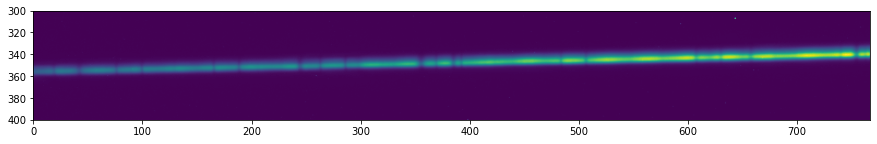

In [9]:
data_zoom = data_flipped[300:400] # rows 300-400 only
plt.figure(figsize=(15,3)) # big figure so that we can see it more clearly
plt.imshow(data_zoom, extent=(0, data_zoom.shape[1], 400, 300))  # "extent" ensures that axes remain properly labelled

If all goes well, you will see dark spots in the spectrum. These are the absorption lines we want to look at (more on this later). Because the spectrum is curved, the absorption lines are tilted: we want them to be straight so that we can work with them better later on. Fortunately, you can easily rotate an image in Python, for example with the *rotate* function from the *scipy.ndimage.interpolation* module.

The next cell contains a piece of code with which you can rotate the spectrum. Decide for yourself, on the basis of an image, which angle is best. For example, you can plot a horizontal line (*plt.axhline*) or a grid (*plt.grid*).

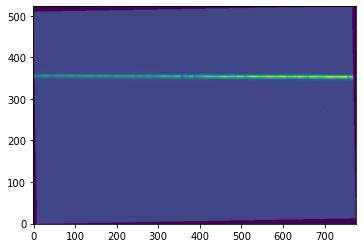

In [19]:
from scipy.ndimage.interpolation import rotate

angle =  # What angle do you use? 

data_rot = rotate(data_flipped, angle)

plt.imshow(data_rot, origin='lower left')
plt.show()

Now the spectrum, if it is right, is horizontal. There is one more operation we have to do on the image before we can continue. As you may have noticed, there are 'edges' glued to the image during rotation. These edges do not contain any data, but are an artifact of the way Python performs the rotation.

In the cell below you can determine which borders you should use to keep only the real data (the spectrum, but also the rest of the image) and cut out the rotation borders.

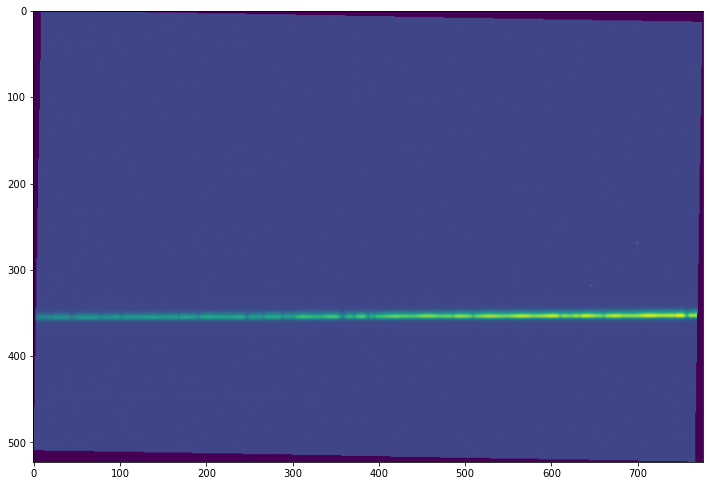

In [20]:
data_final = data_rot[:,:] # select a slice without borders
plt.figure(figsize=(12, 12))  # large figure so that you can test more easily
plt.imshow(data_final)
plt.show()

We have a lot of spectra, each with a corresponding dark-recording, so it is not convenient to read the array by hand every time, pull the dark off, rotate the image and so on. It's more convenient to write a function that reads in the data for a given filename and does all the steps from before (transpose, rotate, etc.) for you, giving only the result.

You can write your data-reading function in the next cell:

In [21]:
#  in principle you just want to put all the steps from above, except the plots, into 1 function

#  Pay attention to how variables can or cannot be reused:
#  local vs global variables is often tricky and can go badly wrong.

In the cell below you can test your code:

In [22]:
# Your code here!

# read a file


# make a plot and see if everything works properly

You now have a function that allows you to easily read a fit file and do the first part of the calibration. 

Now use your function to read in all the spectra.

In [ ]:
# Your code here!


# Spectrum

The spectrum looks - if it is good - like a line with a number of notches . These notches are the absorption lines, some of which are caused by atoms and molecules in the Sun, others by substances in the Earth's atmosphere.

With just a plot as the one above, we cannot, of course, see clearly where the absorption lines are in the spectrum, and whether they have been shifted. It is more convenient to make a plot of the intensity as a function of wavelength. However, we do not know yet which pixel belongs to which wavelength, so as a first approximation we can make a plot of the intensity as a function of pixel position.

The simplest way to do this is to add up the data vertically (i.e. for each column all intensities add up to one value per column). You can, for example, use the numpy function *sum* to do this.

In the cell below you can summarize the data and make a plot of intensity per column.

**Tip**: It is useful to write and test your code with one spectrum first, and only apply it to all spectra when it works.

In [ ]:
# Your code here!

# sum up the data

In [23]:
#  make a plot

If all goes well, you see a line with a number of clear peaks and troughs. The valleys are the aforementioned absorption lines. However, our spectrum is not perfect yet: there is a trend, and noise.

### Noise

Part of the noise comes from the way you add up: if you use the whole column, you also add up all the noise from pixels where the spectrum clearly doesn't stand out. In addition, in some columns you will experience a dead or hot pixel, which may not be properly calibrated with the dark. 

So we can remove some of the noise in the spectrum by no longer adding all the pixels, but only those with the spectrum. From your previous plots, estimate which rows contain the spectrum, and plot these rows: both in the data and in a line graph (as above).

In [ ]:
# Your code here!

In [24]:
# Plot with only the right rows

Do you see a difference between the old and the new spectrum?

In the cell below, make a plot of the difference between the old and the new spectrum:

In [25]:
# Your code here!

How important do you think it is to use only the rows with the spectrum, if you look at the graph above?

### Trend

In the spectrum we see not only a number of peaks and troughs of absorption lines, but also an overall trend. Such a trend can appear in your spectrum for all sorts of reasons: for example, because your CCD is not exposed evenly, or because your pixels are less sensitive to some wavelengths, or even because there really is a trend in the spectrum.

For this assignment, we are interested in the valleys of the absorption lines, and you can work with them more easily without that trend. So we want to eliminate the trend.

The easiest way to do this is to fit a curve to the spectrum, and divide the spectrum accordingly. There are all kinds of ways to fit that curve, but the simplest one is just a polynomial. However, it is important to determine the degree of the polynomial, *N*, correctly. If you choose a too low value for *N*, you will not fit the whole trend and you will not remove it properly; if the grade is too high, you will also fit and remove the real peaks and troughs in the spectrum. Once we have a good fit, we divide the spectrum by it. This is also called *normalising*.

There are all kinds of algorithms to determine the optimum value of *N*, but in this case it is enough to make an estimate by eye. In the cell below you can try different values of *N*. There are a few pieces of code to help you in the process.

We use the function *np.polyfit* to make the fit, and *np.polyval* to calculate the fit values.

In [ ]:
# Your code here!
spectrum = # your spectrum
N =  # What is the best value?

x = np.arange(len(spectrum))  # x-as: pixels

fit = np.polyfit(x, spectrum, deg=N) #  fit a polynomial
fitted_values = np.polyval(fit, x) #  Fill in the x-values in the polynomial to calculate the fit curve.

#  make a plot of the spectrum and the true values to compare

#  divide the spectrum by the fitted curve: do you still see a trend?


WelkeWhat is the best value of *N*? On what do you base that choice?

We have now read the spectrum, rotated it, cleaned it of noise and removed a trend. We are now ready for the next step: coupling wavelengths to the x-axis.

## Wavelength calibration

We now have the spectrum as a function of pixel position. However, we are interested in wavelengths, because we want to determine the wavelength difference between a number of absorption lines. Therefore, we need to calibrate the spectrum to wavelength: which wavelength belongs to which pixel position?

To do this, we use the wavelengths of some known absorption lines: we know what wavelengths they have, so if we find them in our spectrum, we can make a connection between pixel position and wavelength. At http://bass2000.obspm.fr/solar_spect.php you can interactively study the spectrum of the Sun. This spectrum can also be downloaded as a text file, which you can read into Python. This file can be found on Brightspace under the name "solar_spectrum.dat". In this file, a large number of wavelengths (unit: Angstrom, Å) represent the intensity.

For example, on the BASS 2000 website, look at the spectrum centred at 6300 Å with a range of 25 Å. This is about the same part of the spectrum as we measured. Around 6302 Å you can see the absorption lines we are interested in: the two broad iron lines and the two narrow oxygen lines.

<!--
Sources:
Iron: NIST (linked to BASS2000)
Oxygen: http://adsabs.harvard.edu/abs/1966sst..book.....M (by the way, do not see him standing)
-->

Read in the cells below the BASS2000-data and make a plot of the above lines (around 6302 Å). For example, you can use the function *np.where* to find the correct array elements. Normalise the intensity so that the maximum value is 1, so that we can later compare it with our own spectrum. Make sure the axes of your plot are clearly labelled.

In [ ]:
# Your code here!

In [ ]:
# Your code here!

Do you recognise these lines in your own spectrum?

The oxygen lines are caused by oxygen molecules in the Earth's atmosphere: therefore, these lines always have the same wavelengths. That is why we can use these lines to calibrate our wavelengths. The wavelengths of the oxygen lines are 6301,988 Å and 6302,756 Å.

In order to make the connection between pixel position and wavelength, we need to know exactly on which pixels the two oxygen lines lie. For this we use a so-called Gaussian fit.

### Gaussian fit

To determine the pixel position of the oxygen lines, we could simply make a plot of the spectrum, and then try to estimate by eye where the lines fall. However, this is not very accurate. Therefore, what we do is fitting a curve to the line.

Spectral lines can have different shapes. One of the most common is a Gaussian curve. You have come across this curve before; it is also the shape of the normal distribution. Spectral lines can get this shape through an effect called "doppler broadening": the atoms or molecules do not all have the same velocity, causing the spectrum of some to shift slightly to the red or to the blue. The exact shape of a spectral line gives a lot of information about the conditions at the place where the light comes from.

We are only interested here in finding the exact centres of our spectral lines. For this purpose we fit a Gaussian curve to the lines. This is done according to the same principle as the linear fits you made in other assignments: we search for the model that best fits our data.

There are all kinds of methods to quickly find a good fit. One of these is the *least squares* method, in which you calculate the model value for each data point, then calculate the difference between measurement and model, which squares, and then take the sum. When that sum is the lowest, your model is the best. In formula form:

\begin{equation}
S = \sum_{i=1}^n \left(y_i - f(x_i, p) \right)^2
\end{equation}

In that case $S$ is the sum you want to minimize, $x_i$ and $y_i$ are the data (in our case $x$ is pixel position and $y$ intensity) and $f(x_i, p)$ is the curve you fit, with function $f$ and parameters $p$.

As you learned in the error calculation assignment, the Gaussian function (or normal distribution) has the following form:

\begin{equation}
f(x) = a \, \exp\left(\frac{- (x - \mu)^2}{2 \sigma^2}\right)
\end{equation}

In which $a$ is the amplitude, $\exp$ is the exponential function ($\exp(x) = e\,^x$), $\mu$ is the average, and $\sigma$ is the standard deviation. $a$, $\mu$ and $\sigma$ are the parameters of this function.

The application of the *least squares*-fit can again be done in many ways, for example by trying out a large number of parameters, and seeing which ones give the best fit. This is easy to program, but can take a lot of time to execute. One of Python's strengths is that there is an enormous library of modules in which, for example, the fitting of curves has been implemented.

Here we use the *curve_fit* function from the *scipy.optimize* module. This function uses the Levenberg-Marquardt algorithm to fit a given function to data. You can find more information about its exact operation in *scipy*'s documentation: <br>.
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.curve_fit.html

The most important thing to know here is that *curve_fit* has the following parameters:
* `f`: the function you want to fit, in our case a Gaussian curve
* `xdata`: the x-axis of your data, in our case pixel position
* `ydata`: the y-axis of your data, in our case intensity
* `p0`: a first estimation of the parameters of `f`.

The output of *curve_fit* consists of two arrays: `popt`, the best parameters, and `pcov`, the uncertainties in those parameters.

In the cells below we will perform the fit. First we import *curve_fit* and create a function for the Gaussian curve:

In [ ]:
# definitions
from scipy.optimize import curve_fit

def gauss(x, a, mu, sigma):
    # negative because the curve is subtracted from the spectrum, which is in absorption
    return - a * np.exp(-(x - mu)**2 / (2 * sigma**2))

For the fit we only want to use the data points that are in the line. Therefore, for both oxygen lines, we first need to find which indices in the array belong to the line. In the cell below you can make this selection, for example by means of a number of plots.

In order to get a good fit, we also need to normalise the lines. This is because the Gaussian function does not include a vertical offset. Simply subtract the maximum of both lines from the lines themselves. You can use the *np.max* function, for example.

As a result, you want to have arrays for each of the two lines with the pixel positions and wavelengths associated with that line.

In [ ]:
# Your code here!
# Make a plot of your selections to check that it is correct

Then use *curve_fit* to fit the *gauss* function to both lines. Think carefully about the values you give in the parameter `p0`!

In [ ]:
# Your code here!

You should now have an array `popt` for both lines with the optimal parameters for that line. Which element of `popt` corresponds to which parameter? Which one are we interested in here?

To check whether the fit is correct, it is useful to re-plot the data with the fit. If you plot the data using the *plt.scatter* function instead of *plt.plot*, you will see the separate data points without connecting lines. Plot the model with lines and you can easily assess whether the fit is correct. To plot the model, simply apply the *gauss* function to the range of the x-axis where your line is, with the optimum parameters.

When plotting, remember that you clearly label all axes, data, etc...

In [ ]:
# Your code here!

# Calculate the model

In [ ]:
# Your code here!

# Plot the data and model

Are you satisfied with the fits? Why yes/no?

Now that we know the exact pixel positions of the lines, we can finally make the connection between pixel and wavelength. We assume that this is a linear relationship. The wavelengths of the oxygen lines are 6301.988 Å and 6302.756 Å respectively.

Calculate the relationship between pixel position and wavelength. Use that to plot the data with wavelength on the x-axis and intensity on the y-axis, and compare it to the spectrum of BASS-2000, for example by plotting them in one figure. Choose the range on the x-axis in such a way that you have a clear view of both the oxygen and iron lines. Don't forget to label everything clearly!

In [ ]:
# Your code here!

# Convert pixel positions to wavelengths


In [ ]:
# Your code here!

# Plot the measured spectrum and that of BASS-2000 on top of each other, with wavelength on the x-axis

Are the oxygen lines of your spectrum in the same place as those of BASS-2000? And the iron lines? Why yes/no?

### Iron lines

We now know how to convert pixel positions to wavelengths. This brings us one step closer to our final goal: determining the rotation velocity of the sun.

As you may have seen in the previous section, the iron lines of the spectrum are shifted in relation to the reference spectrum of BASS-2000. That is the Doppler shift due to the rotation of the sun. 

Now, in the same way as before, we want to determine the wavelengths of the iron lines. Because we already know how to convert pixel positions to wavelengths, you can immediately use wavelengths for the fit.

Think about making plots where necessary to check the quality of your fits.

In [ ]:
# Your code here!

In [ ]:
# Your code here!

In [ ]:
# Your code here!

You can now calculate how much both iron lines have shifted, knowing that their original wavelengths are 6301.5008 Å and 6302.4932 Å. Use the low-velocity redshift approach for this:
<!-- values from NIST as linked to BASS2000 -->
\begin{equation}
z = \frac{\lambda_o - \lambda_s}{\lambda_s} = \frac{v_o}{c}
\end{equation}
Where $\lambda_o$ is the observed wavelength and $\lambda_s$ is the rest-frame wavelength and $v_o$ is the observed velocity.

Use these two iron lines to calculate the velocity of this part of the sun.

In [26]:
from astropy.constants import c
c = c.value  # c is in units of m/s

# Your code here!

The function *curve_fit* that we used to find the centre of the Gaussian curves also gave the covariant matrix `pcov`. The uncertainty in the parameters of the fit is the square root of the values in the diagonal of this matrix. For example: the uncertainty of the amplitude (element `0` of `popt`) is the root of element `[0,0]` of `pcov`.

Calculate the uncertainties at the velocities you calculated above. Then calculate the average of the two, and the uncertainty thereon.

In [ ]:
# Your code here!

### All spectra

For one measured spectrum you have now done the complete reduction from image to the velocity of that part of the sun. We now want to do this for all measured spectra, so that we can see how this changes across the equator of the sun.

Now apply the steps below to all spectra. This can be done in a for-loop, for example. Of course you don't have to make every plot for every spectrum.

* Add up the spectrum column by column. Can you always use the same rows as before?
* Remove the trend from the spectrum.
* Fit the positions of the oxygen lines. Can you always use the same selection of pixels for this fit?
* Convert pixels to wavelengths.
* Fit the positions of the iron lines. Can you always use the same selection of data for these fits?
* Calculate the velocities using the iron lines, and the uncertainties on them.
* Calculate the final velocity associated with this spectrum.

Store the final velocities and the uncertainties in an array.

In [ ]:
# Your code here!

In [ ]:
# Your code here!

### Rotation velocity

Now you have determined the velocity of the sun in all positions. The last thing that remains to be done, 
is to determine the rotation velocity of the sun. To determine the rotation velocity it is up to you to 
write a python program that does this including determining the error.

Also make a plot of the rotation speed against the distance from the centre of the sun and add it to your report.
Good luck!